Total positions analyzed: 340223
Average legal moves per position: 22.26
Median legal moves per position: 22.00


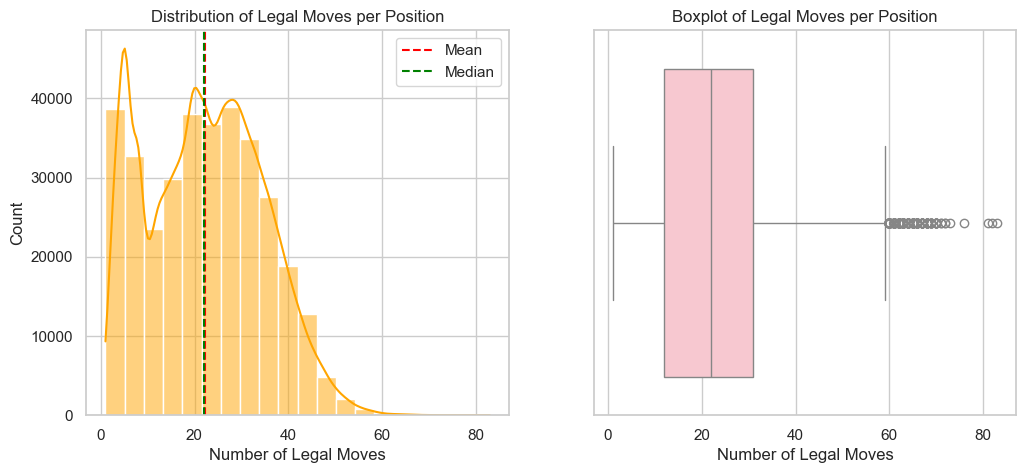

In [1]:
import chess
import random
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

# -----------------------------
# 1. Parameters
# -----------------------------
num_games = 1000   # number of random games to generate
max_plies = 456   # maximum plies (plies = half-moves), longer than a realistic chess game
legal_moves_counts = []

# -----------------------------
# 2. Generate random games
# -----------------------------
for _ in range(num_games):
    board = chess.Board()
    for ply in range(max_plies):
        if board.is_game_over():
            break
        moves = list(board.legal_moves)
        legal_moves_counts.append(len(moves))
        move = random.choice(moves)
        board.push(move)

# -----------------------------
# 3. Compute statistics
# -----------------------------
mean_moves = statistics.mean(legal_moves_counts)
median_moves = statistics.median(legal_moves_counts)
print(f"Total positions analyzed: {len(legal_moves_counts)}")
print(f"Average legal moves per position: {mean_moves:.2f}")
print(f"Median legal moves per position: {median_moves:.2f}")

# -----------------------------
# 4. Plotting
# -----------------------------
sns.set(style="whitegrid")

# Histogram and KDE
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(legal_moves_counts, bins=20, kde=True, color="orange")
plt.axvline(mean_moves, color='red', linestyle='--', label="Mean")
plt.axvline(median_moves, color='green', linestyle='--', label="Median")
plt.title("Distribution of Legal Moves per Position")
plt.xlabel("Number of Legal Moves")
plt.ylabel("Count")
plt.legend()

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(x=legal_moves_counts, color="pink")
plt.title("Boxplot of Legal Moves per Position")
plt.xlabel("Number of Legal Moves")
plt.show()


